# Intermediate representation (IR)

$$
\newcommand{\iv}{{\mathrm{i}\nu}}
\newcommand{\wmax}{{\omega_\mathrm{max}}}
\newcommand{\dd}{{\mathrm{d}}}
$$

## One-particle Green's function

We introduce a Green’s function with imaginary arguments in time and frequency.
This has no physical meaning but is merely a mathematical trick and makes calculations easier (to give another example of this: in Minsowski spacetime we take advantage of a similiar substitution)

The so-called imaginary-frequency (Matsubara) Green's functions are defined as followed: 

$$
G_{ij}(\tau-\tau') = -\langle T_\tau [c_i(\tau){c}^\dagger_j(\tau')]\rangle,
$$

where $i$ and $j$ denote spin/orbital/band and $T_\tau$ is the time-ordering operator.
Here $\tau$ represents a imaginary time unit $\mathrm{i}t$,
while $c_i$/$c_j$ is a fermionic or bosonic annihilation/creation operator.

The Fourier Transformation of $G_{ij}(\tau)$ (with $\tau \in [0,\beta]$) reads

$$
G_{ij}(\iv_n) = \int_0^{\beta} \dd \tau e^{\iv_n\tau} G_{ij}(\tau),
$$

where $\nu_n = (2n+1)\pi/\beta$ (fermion) and $\nu_n = 2n\pi/\beta$ (boson) with $n$ being an integer.
The inverse temperature is denoted by $\beta$ (We take $\hbar=1$).
The inverse transformation is given by

$$
G_{ij}(\tau) = \frac{1}{\beta}\sum_{n=-\infty}^\infty e^{-\iv_n\tau}G_{ij}(\iv_n).
$$ 

Continuing $G_{ij}(\iv_n)$ to a holomorphic function in the upper half of the complex plane,
the imaginary-frequency (Matsubara) Green's function can be related to the "orginary" retarded Green's function as

$$
G_{ij}^\mathrm{R}(\omega)=G_{ij}(z \rightarrow \omega+\mathrm{i}0^{+}).
$$

In the following, we omit the symbols $i$, $j$, $n$ unless there is confusion.

## Lehmann representation

In the imaginary-frequency domain, the Lehmann representation reads

$$
\begin{align}
    G(\iv) &= \int_{-\infty}^\infty \dd\omega \underbrace{\frac{1}{\iv - \omega}}_{\equiv K(\iv, \omega)} A(\omega),
\end{align}
$$

where $A(\omega)$ is a spectral function.
$K(\iv, \omega)$ is the so-called analytic continuation kernel.
The Lehmann representation can be transformed to the imaginary-time domain as

$$
\begin{align}
    G(\tau) &= - \int_{-\infty}^\infty \dd\omega K(\tau, \omega) A(\omega),
\end{align}
$$ (lehmann-tau)

where $0 < \tau < \beta$ and 

$$
\begin{align}
    K(\tau, \omega) &\equiv - \frac{1}{\beta} \sum_{\iv} e^{-\iv \tau} K(\iv, \omega) =
    \begin{cases}
        \frac{e^{-\tau\omega}}{1+e^{-\beta\omega}} & (\mathrm{fermion}),\\
        \frac{e^{-\tau\omega}}{1-e^{-\beta\omega}} & (\mathrm{boson})
    \end{cases}.
\end{align}
$$

The minus sign originates from our the convention $K(\tau, \omega) > 0$.
To avoid the divergence of the bosonic kernel at $\omega=0$, we reformulate Eq. {eq}`lehmann-tau` as

$$
\begin{equation}
    G(\tau)= - \int_{-\infty}^\infty\dd{\omega} K^\mathrm{L}(\tau,\omega) \rho(\omega),
\end{equation}
$$

where $K^\mathrm{L}(\tau, \omega)$ is the "logistic kernel" defined as

$$
K^\mathrm{L}(\tau, \omega) =  \frac{e^{-\tau\omega}}{1+e^{-\beta\omega}},
$$ (KL)

and $\rho(\omega)$ is the modified spectral function

$$
\begin{align}
    \rho(\omega) &\equiv 
    \begin{cases}
        A(\omega) & (\mathrm{fermion}),\\
        \frac{A(\omega)}{\tanh(\beta \omega/2)} & (\mathrm{boson}).
    \end{cases}
\end{align}
$$

## Singular value expansion and basis functions

The singular value expnasion of the kernel {eq}`KL` reads {cite:p}`Shinaoka:2017ix`

$$
K^\mathrm{L}(\tau, \omega) = \sum_{l=0}^\infty U_l(\tau) S_l V_l(\omega),
$$

for $\omega \in [-\wmax, \wmax]$ with $\wmax$ (>0) being a cut-off frequency.
$U_l(\tau)$ and $V_l(\omega)$ are left and right singular functions and $S_l$ as the singular values (with $S_0>S_1>S_2>...>0$).
The two sets of singular functions $U$ and $V$ make up the basis functions of the so-called Intermediate Representation (IR), which depends on $\beta$ and the cutoff $\wmax$.
For the peculiar choice of the regularization for the bosonic kernel using $K^\mathrm{L}$, these basis functions do not depend on statistical properties.
The basis functions $U_l(\tau)$ are transformed to the imaginary-frequency axis as

$$
U_l(\iv) \equiv \int_0^\beta \dd \omega e^{\iv \tau} U_l(\tau).
$$

Some of the information regarding real-frequency properties of the system is often lost during transition into the imaginary-time domain, so that the imaginary-frequency Green's function does hold less information than the real-frequency Green's function. The reason for using IR lies within its compactness and ability to display that information in imaginary quantities.

The decay of the singular values depends on $\beta$ and $\wmax$ only through the dimensionless parameter $\Lambda\equiv \beta\wmax$.
The following plots show the singular values and the basis functions computed for $\beta=10$ and $\wmax=10$.

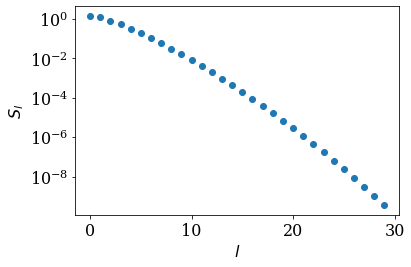

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sparse_ir

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 16,
})

lambda_ = 100
beta = 10
wmax = lambda_/beta
basis = sparse_ir.FiniteTempBasis('F', beta, wmax, eps=1e-10)

plt.semilogy(basis.s, marker='o', ls='')
plt.xlabel(r'$l$')
plt.ylabel(r'$S_l$')
plt.tight_layout()
plt.show()

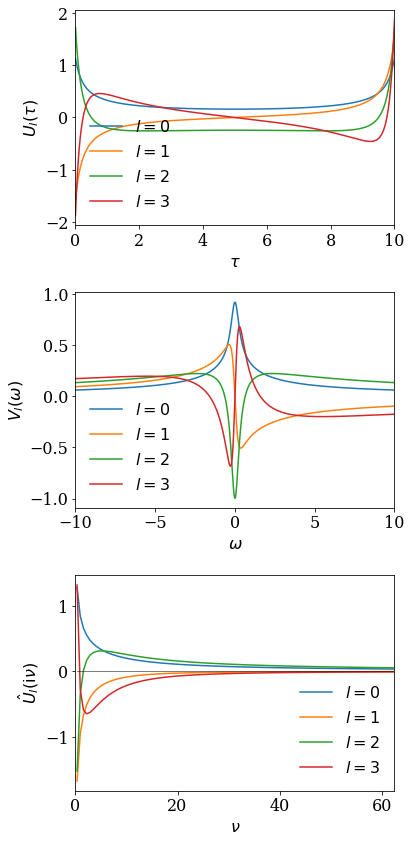

In [2]:
fig = plt.figure(figsize=(6,12))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
axes = [ax1, ax2, ax3]

taus = np.linspace(0, beta, 1000)
omegas = np.linspace(-wmax, wmax, 1000)

beta = 10
nmax = 100

v = 2*np.arange(nmax)+1
iv = 1J * (2*np.arange(nmax)+1) * np.pi/beta

uhat_val = basis.uhat(v)
for l in range(4):
    ax1.plot(taus, basis.u[l](taus), label=f'$l={l}$')
    ax2.plot(omegas, basis.v[l](omegas), label=f'$l={l}$')
    y = uhat_val[l,:].imag if l%2 == 0 else uhat_val[l,:].real
    ax3.plot(iv.imag, y, label=f'$l={l}$')

ax1.set_xlabel(r'$\tau$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$U_l(\tau)$')
ax2.set_ylabel(r'$V_l(\omega)$')
ax1.set_xlim([0,beta])
ax2.set_xlim([-wmax, wmax])

ax3.plot(iv.imag, np.zeros_like(iv.imag), ls='-', lw=0.5, color='k')
ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\hat{U}_l(\mathrm{i}\nu)$')
ax3.set_xlim([0, iv.imag.max()])

for ax in axes:
    ax.legend(loc='best', frameon=False)

plt.tight_layout()